# Data processing 

In [1]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
import pathlib
import datetime

In [2]:


! pip install kaggle


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/


! chmod 600 ~/.kaggle/kaggle.json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle datasets download -d ananthu017/emotion-detection-fer

 87% 57.0M/65.2M [00:00<00:00, 138MB/s]
100% 65.2M/65.2M [00:00<00:00, 137MB/s]


In [4]:
! unzip emotion-detection-fer

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [5]:
data_dir = pathlib.Path("/content/train")
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)
# classnames in the dataset specified
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])
print(CLASS_NAMES)
# print length of class names
output_class_units = len(CLASS_NAMES)
print(output_class_units)

28709
['happy' 'neutral' 'fearful' 'disgusted' 'sad' 'surprised' 'angry']
7


In [6]:
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(output_class_units, activation='sigmoid')
])

In [7]:
data_dir2 = pathlib.Path("/content/test")

BATCH_SIZE = 32             # Can be of size 2^n, but not restricted to. for the better utilization of memory
IMG_HEIGHT = 227            # input Shape required by the model
IMG_WIDTH = 227             # input Shape required by the model
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

# Rescalingthe pixel values from 0~255 to 0~1 For RGB Channels of the image.
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# training_data for model training
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))

val_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))

test_data_gen = image_generator.flow_from_directory(directory=str(data_dir2),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))

Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Summarizing the model architecture and printing it out
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [9]:
history_1 = model.fit(train_data_gen,
      steps_per_epoch=STEPS_PER_EPOCH,
      epochs=20,
    validation_data=val_data_gen)

Epoch 1/20
898/898 [==============================] - 207s 208ms/step - loss: 2.7671 - accuracy: 0.2637 - precision: 0.1827 - recall: 0.8276 - val_loss: 1.7482 - val_accuracy: 0.3053 - val_precision: 0.1931 - val_recall: 0.7952
Epoch 2/20
898/898 [==============================] - 192s 214ms/step - loss: 1.6977 - accuracy: 0.3309 - precision: 0.1886 - recall: 0.8910 - val_loss: 1.6887 - val_accuracy: 0.3421 - val_precision: 0.1894 - val_recall: 0.9022
Epoch 3/20
898/898 [==============================] - 192s 214ms/step - loss: 1.6093 - accuracy: 0.3708 - precision: 0.1974 - recall: 0.8962 - val_loss: 1.5117 - val_accuracy: 0.4115 - val_precision: 0.2034 - val_recall: 0.9120
Epoch 4/20
898/898 [==============================] - 192s 214ms/step - loss: 1.5195 - accuracy: 0.4057 - precision: 0.2073 - recall: 0.9053 - val_loss: 1.4357 - val_accuracy: 0.4315 - val_precision: 0.2073 - val_recall: 0.9301
Epoch 5/20
898/898 [==============================] - 233s 259ms/step - loss: 1.4466 - a

In [10]:
print("Testing Accuracy",model.evaluate(test_data_gen )) 

225/225 [==============================] - 13s 59ms/step - loss: 2.8227 - accuracy: 0.5298 - precision: 0.3343 - recall: 0.7378
Testing Accuracy [2.8227171897888184, 0.529813289642334, 0.3342801332473755, 0.737809956073761]


In [11]:
model.save('my_model.h5')

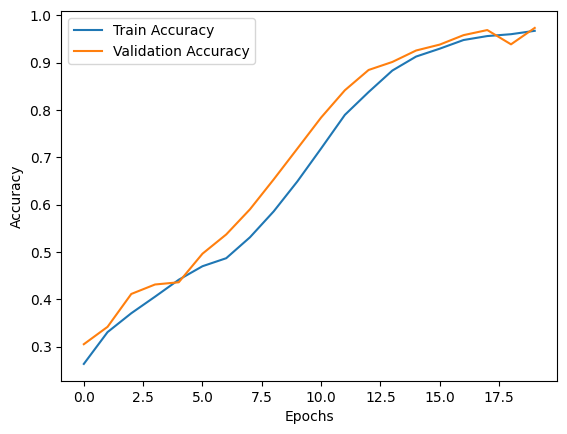

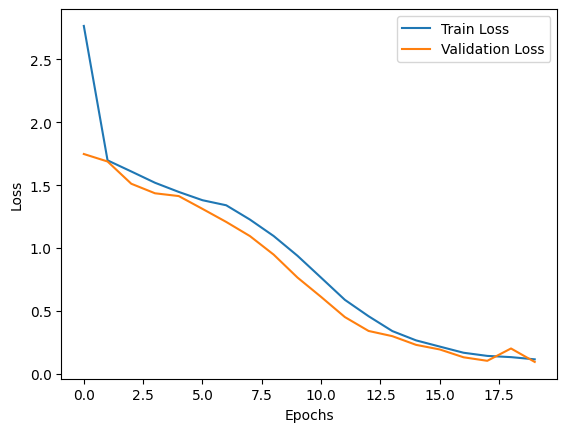

225/225 [==============================] - 11s 50ms/step - loss: 2.8227 - accuracy: 0.5298 - precision: 0.3343 - recall: 0.7378
Testing Accuracy: [2.8227195739746094, 0.529813289642334, 0.3342801332473755, 0.737809956073761]


In [14]:
# Accessing the accuracy and loss values from history object
train_acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

# Plotting the train and validation accuracy curves
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the train and validation loss curves
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating the model on test data
y_pred = model.predict(test_data_gen)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_data_gen.labels



print("Testing Accuracy:", model.evaluate(test_data_gen))


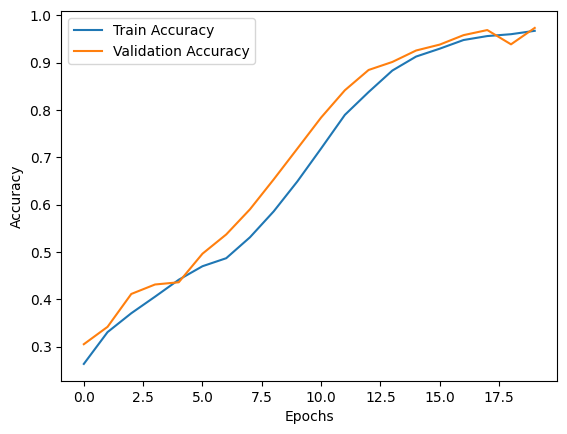

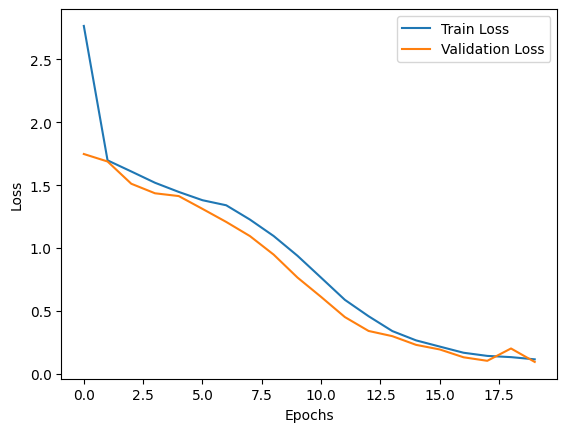

225/225 [==============================] - 10s 46ms/step - loss: 2.8227 - accuracy: 0.5298 - precision: 0.3343 - recall: 0.7378
Testing Loss: 2.8227176666259766
Testing Accuracy: 0.529813289642334
Testing Precision: 0.3342801332473755
Testing Recall: 0.737809956073761
225/225 [==============================] - 10s 46ms/step
Confusion Matrix:
 [[457 321 250  22 300 190 234]
 [287 240 143  13 244 153 153]
 [245 211 122  13 173 125 135]
 [ 30  25   8   1  21  13  13]
 [291 244 153  15 230 151 163]
 [214 159  92  11 147  84 124]
 [244 204 100  13 157 126 114]]
True Positives: [457 240 122   1 230  84 114]
True Negatives: [4093, 4781, 5408, 6980, 4889, 5589, 5398]
False Positives: [1311, 1164, 746, 87, 1042, 758, 822]
False Negatives: [1317, 993, 902, 110, 1017, 747, 844]
Precision: [0.25848416 0.17094017 0.140553   0.01136364 0.18081761 0.09976247
 0.12179487]
Recall: [0.25760992 0.1946472  0.11914062 0.00900901 0.18444266 0.10108303
 0.11899791]
F1-Score: [0.2580463  0.18202503 0.12896406

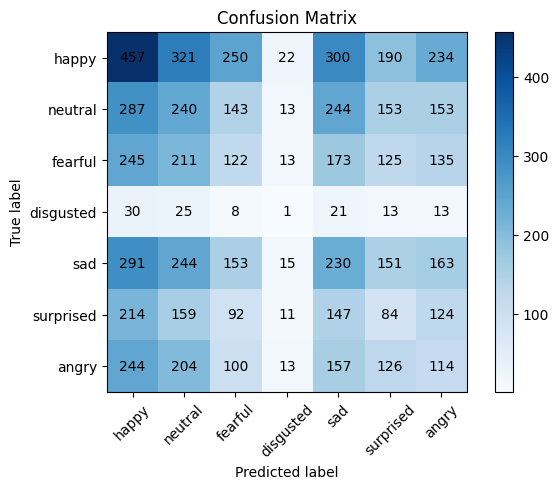

In [23]:
# Accessing the accuracy and loss values from history object
train_acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

# Plotting the train and validation accuracy curves
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the train and validation loss curves
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating the model on test data
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_data_gen)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_acc)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)

# Creating the confusion matrix
test_labels = test_data_gen.classes
predictions = model.predict(test_data_gen)
cm = tf.math.confusion_matrix(test_labels, np.argmax(predictions, axis=1)).numpy()

# Calculating the true positives, true negatives, false positives, false negatives
tp = np.diag(cm)
tn = []
fp = []
fn = []
for i in range(output_class_units):
    tn.append(np.sum(cm) - np.sum(cm[i,:]) - np.sum(cm[:,i]) + cm[i,i])
    fp.append(np.sum(cm[:,i]) - cm[i,i])
    fn.append(np.sum(cm[i,:]) - cm[i,i])

# Creating the evaluation matrix
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * ((precision * recall) / (precision + recall))

# Printing the confusion matrix and evaluation matrix
print("Confusion Matrix:\n", cm)
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Creating the confusion matrix image
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(CLASS_NAMES))
plt.xticks(tick_marks, CLASS_NAMES, rotation=45)
plt.yticks(tick_marks, CLASS_NAMES)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.show()



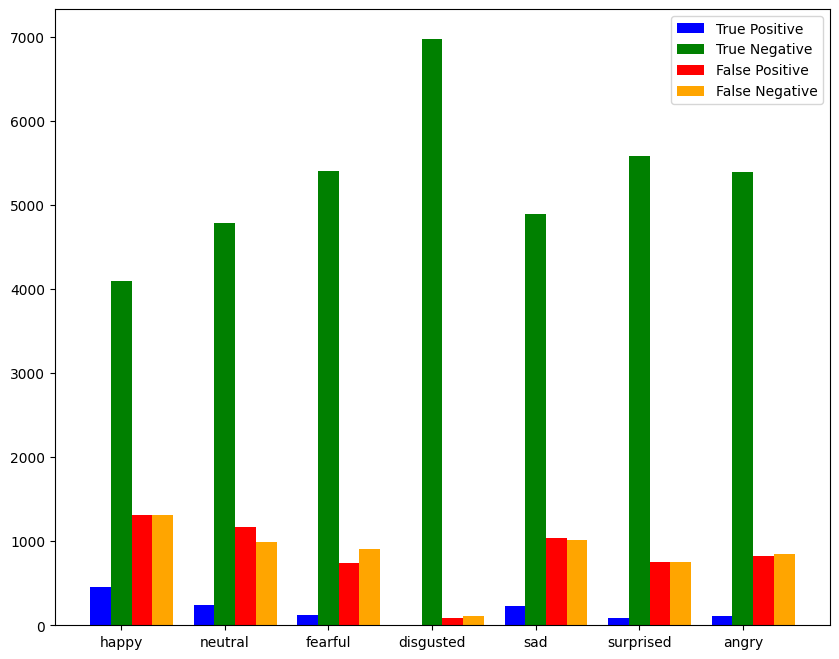

In [24]:
# Creating the grouped bar chart
labels = CLASS_NAMES
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width, tp, width, label='True Positive', color='blue')
rects2 = ax.bar(x, tn, width, label='True Negative', color='green')
rects3 = ax.bar(x + width, fp, width, label='False Positive', color='red')
rects4 = ax.bar(x + 2*width, fn, width, label='False Negative', color='orange')

# Adding x-axis labels and legend
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Displaying the plot
plt.show()
